In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import division
import random
%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0, 10.0)

In [8]:
#load data
game_15 = pd.read_csv('./data/game_2015.csv')
qb_15 = pd.read_csv('./data/qb_15.csv')
rev_15 = pd.read_csv('./data/rev_2015.csv')
team_15 = pd.read_csv('./data/team_2015.csv')

#difference in team names
print 'Team names in qb_15 not in game_15 data:\n {}'.format([i for i in qb_15.Tm if i not in game_15.h_name.tolist()])
print 'Team names in rev_15 not in game_15 data:\n {}'.format([i for i in rev_15.Team if i not in game_15.h_name.tolist()])
print 'Team names in team_15 not in game_15 data:\n {}\n'.format([i for i in team_15.Tm if i not in game_15.h_name.tolist()])
tm_map = {'NOR':'NO', 'KAN':'KC', 'GNB':'GB', 'SDG':'SD', 'TAM':'TB', 'SFO':'SF','JAX':'JAC'}

#replace team names
qb_15['Tm'] = qb_15['Tm'].replace(tm_map)
rev_15['Team'] = rev_15['Team'].replace(tm_map)
team_15['Tm'] = team_15['Tm'].replace(tm_map)
#team_15['score_diff'] = team_15.score - team_15.oppo_score
#team_15.drop(['score', 'oppo_score'], axis = 1, inplace = True)

#Table join
data_15 = game_15.drop(['h_score', 'a_score'], axis = 1)
#QB
data_15 = pd.merge(data_15, qb_15, left_on='h_name', right_on='Tm')
data_15 = pd.merge(data_15, qb_15, left_on='a_name', right_on='Tm', suffixes=('_home', '_away'))
#REV
data_15 = pd.merge(data_15, rev_15, left_on='h_name', right_on='Team')
data_15 = pd.merge(data_15, rev_15, left_on='a_name', right_on='Team', suffixes=('_home','_away'))
#SCORE
data_15 = pd.merge(data_15, team_15, left_on='h_name', right_on='Tm')
data_15 = pd.merge(data_15, team_15, left_on='a_name', right_on='Tm', suffixes=('_home','_away'))


#clean up
data_15['age_diff'] = data_15.Age_home - data_15.Age_away
data_15['qbr_diff'] = data_15.QBR_home - data_15.QBR_away
data_15['rev_diff'] = data_15.value_2015_home - data_15.value_2015_away
data_15['injury_diff'] = data_15.injure_home - data_15.injure_away
data_15['result_diff'] = data_15.h_min_a
data_15['score_diff'] = data_15.score_home - data_15.score_away
data_15['oppo_score_diff'] = data_15.oppo_score_home - data_15.oppo_score_away

col_names = [i for i in data_15.columns if i.endswith('diff')]
data_15 = data_15[col_names]
assert np.sum(data_15.isnull().sum()) == 0

Team names in qb_15 not in game_15 data:
 ['NOR', 'KAN', 'GNB', 'SDG', 'TAM', 'SFO', 'JAX']
Team names in rev_15 not in game_15 data:
 ['JAX']
Team names in team_15 not in game_15 data:
 ['JAX']



In [9]:
#same thing with 2016 data
game_16 = pd.read_csv('./data/game_2016.csv')
qb_16 = pd.read_csv('./data/qb_16.csv')
rev_16 = pd.read_csv('./data/rev_2016.csv')
team_16 = pd.read_csv('./data/team_2016.csv')
print 'Team names in qb_16 not in game_16 data:\n {}'.format([i for i in qb_16.Tm if i not in game_16.h_name.tolist()])
print 'Team names in rev_16 not in game_16 data:\n {}'.format([i for i in rev_16.Team if i not in game_16.h_name.tolist()])
print 'Team names in team_16 not in game_16 data:\n {}\n'.format([i for i in team_16.Tm if i not in game_16.h_name.tolist()])
qb_16['Tm'] = qb_16['Tm'].replace(tm_map)
rev_16['Team'] = rev_16['Team'].replace(tm_map)
team_16['Tm'] = team_16['Tm'].replace(tm_map)

data_16 = game_16.drop(['h_score', 'a_score'], axis = 1)
data_16 = pd.merge(data_16, qb_16, left_on='h_name', right_on='Tm')
data_16 = pd.merge(data_16, qb_16, left_on='a_name', right_on='Tm', suffixes=('_home', '_away'))
data_16 = pd.merge(data_16, rev_16, left_on='h_name', right_on='Team')
data_16 = pd.merge(data_16, rev_16, left_on='a_name', right_on='Team', suffixes=('_home','_away'))
data_16 = pd.merge(data_16, team_16, left_on='h_name', right_on='Tm')
data_16 = pd.merge(data_16, team_16, left_on='a_name', right_on='Tm', suffixes=('_home','_away'))

data_16['age_diff'] = data_16.Age_home - data_16.Age_away
data_16['qbr_diff'] = data_16.QBR_home - data_16.QBR_away
data_16['rev_diff'] = data_16.value_home - data_16.value_away
data_16['injury_diff'] = data_16.injure_home - data_16.injure_away
data_16['result_diff'] = data_16.h_min_a
data_16['score_diff'] = data_16.score_home - data_16.score_away
data_16['oppo_score_diff'] = data_16.oppo_score_home - data_16.oppo_score_away

col_names = [i for i in data_16.columns if i.endswith('diff')]
data_16 = data_16[col_names]
data = pd.concat([data_15, data_16], axis = 0)
data['result'] = [0 if i < 0 else 1 for i in data['result_diff']] 
assert np.sum(data_16.isnull().sum()) == 0

Team names in qb_16 not in game_16 data:
 ['GNB', 'NOR', 'KAN', 'TAM', 'SDG', 'SFO', 'LAR', nan]
Team names in rev_16 not in game_16 data:
 []
Team names in team_16 not in game_16 data:
 []



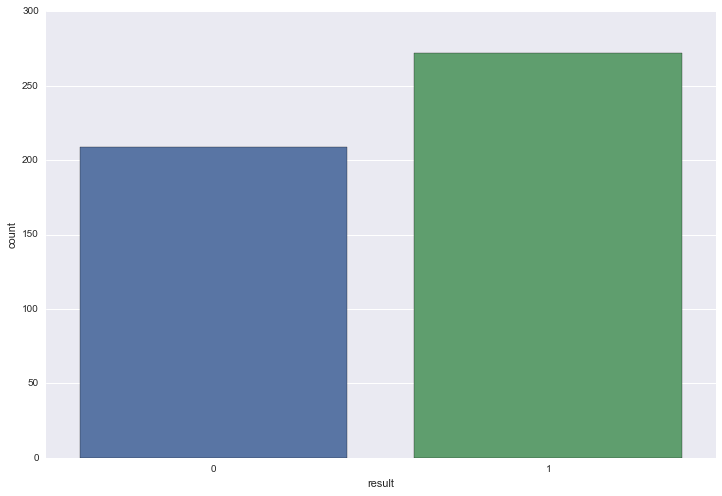

In [12]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data.result)
#balanced label

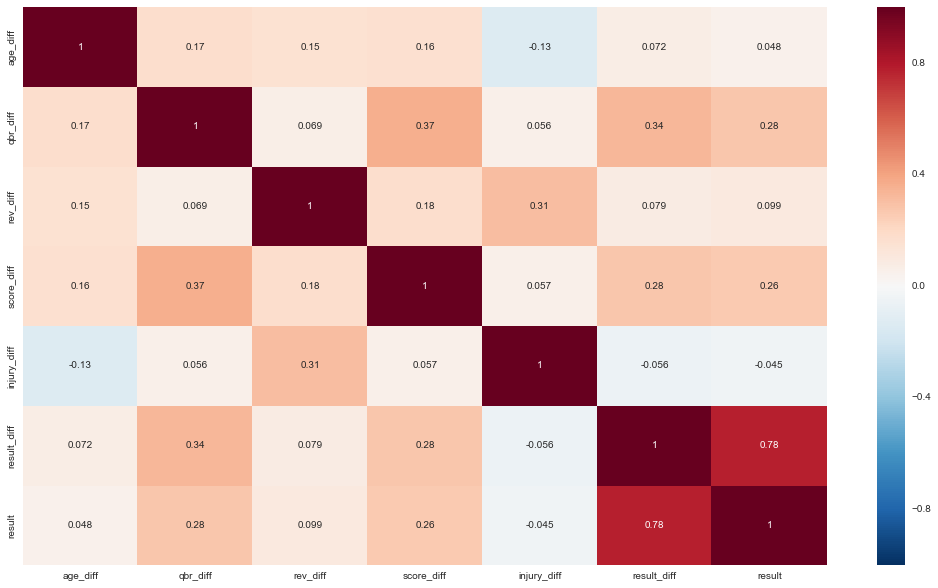

In [117]:
#correlations
fig = plt.figure()
sns.set(font_scale=1)
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 10})

Index([u'age_diff', u'qbr_diff', u'rev_diff', u'injury_diff', u'result_diff',
       u'score_diff', u'oppo_score_diff', u'result'],
      dtype='object')


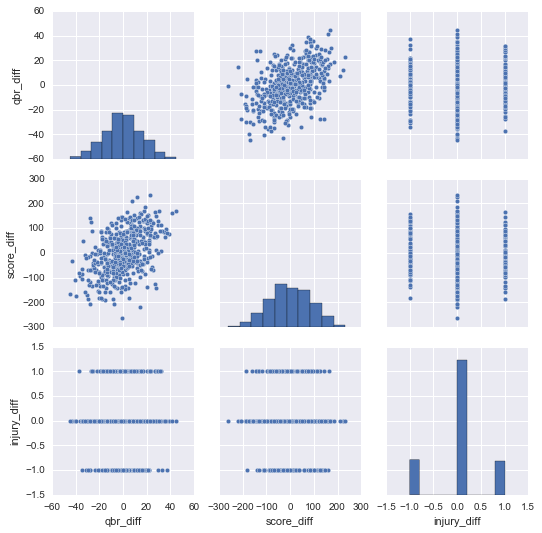

In [21]:
print data.columns
ax = sns.pairplot(data, x_vars=['qbr_diff', 'score_diff', 'injury_diff'], y_vars=['qbr_diff', 'score_diff', 'injury_diff'])

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = data.drop(['result', 'result_diff', 'injury_diff'], axis = 1)
Y = data['result']

#standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.hstack([X, data['injury_diff'].values.reshape(-1,1)])

train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3, random_state=0)

params = {'C':[0.1, 0.5, 1, 5, 10]}
clf = GridSearchCV(LogisticRegression(), params, cv=5, n_jobs=-1).fit(train_x, train_y)

logistic_regression_accuracy = 100* clf.score(test_x, test_y)
print 'Logistic Regreesion accuracy: {}%'.format(logistic_regression_accuracy)

Logistic Regreesion accuracy: 58.6206896552%


In [258]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
LDA_accuracy = 100*LDA.score(test_x, test_y)
print 'LDA accuracy: {}%'.format(LDA_accuracy)

LDA accuracy: 59.3103448276%


In [259]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(train_x, train_y)
naive_beyas_accuracy = 100*clf.score(test_x, test_y)
print 'Naive Beyas accuracy: {}%'.format(naive_beyas_accuracy)

Naive Beyas accuracy: 56.5517241379%


In [393]:
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth':[1, 2, 3]}
RF = RandomForestClassifier(n_estimators=150, n_jobs=-1)
clf = GridSearchCV(RF, params, cv=5).fit(train_x, train_y)
print clf.best_params_

random_forest_accuracy = 100*clf.score(test_x, test_y)
print 'Random Forest accuracy: {}%'.format(random_forest_accuracy)

{'max_depth': 3}
Random Forest accuracy: 58.6206896552%


In [260]:
from sklearn.ensemble import AdaBoostClassifier

params = {'learning_rate':[0.01, 0.05, 0.1, 0.5, 1]}
Ada = AdaBoostClassifier(random_state=0, n_estimators=300)
clf = GridSearchCV(Ada, params, cv=3).fit(train_x, train_y)
print clf.best_params_

Ada_accuracy = 100*clf.score(test_x, test_y)
print 'AdaBoosting accuracy: {}%'.format(Ada_accuracy)

{'learning_rate': 0.05}
AdaBoosting accuracy: 57.2413793103%


In [396]:
from sklearn.ensemble import GradientBoostingClassifier
params = {'learning_rate':[0.01, 0.1,0.5], 'max_depth':[2,3]}
GB = GradientBoostingClassifier(n_estimators=200)
clf = GridSearchCV(GB, params, cv=3).fit(train_x, train_y)
print clf.best_params_

GB_accuracy = 100*clf.score(test_x, test_y)
print 'GradientBoosting accuracy: {}%'.format(GB_accuracy)

{'learning_rate': 0.01, 'max_depth': 2}
GradientBoosting accuracy: 58.6206896552%


In [398]:
from sklearn.svm import SVC
params = {'kernel':['linear', 'rbf'], 'C':[0.01, 0.05, 0.1,0.5, 1]}
SVM = SVC()
clf = GridSearchCV(SVM, params, cv=3).fit(train_x, train_y)
print clf.best_params_

SVM_accuracy = 100*clf.score(test_x, test_y)
print 'SVM accuracy: {}%'.format(SVM_accuracy)

{'kernel': 'linear', 'C': 1}
SVM accuracy: 60.0%


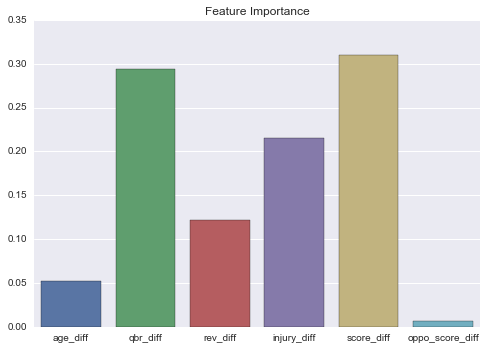

In [455]:
#feature importance
clf = RandomForestClassifier(n_estimators=150, max_depth=2).fit(train_x, train_y)
feature_importances = clf.feature_importances_

feature_names = data.drop(['result', 'result_diff'], axis = 1).columns
feature_importances = pd.Series(feature_importances, index=feature_names)

ax = sns.barplot(x=feature_importances.index, y=feature_importances)
ax.set_title('Feature Importance')

## Next Steps:
1. Model ensembling? (Majority vote?)
2. More features?

In [77]:
#ensemble on different models
#prediction is made based on weighted probability
#weights calculated by cross validation
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

class UnTrainError(Exception):
    pass

class ensemble_model(object):
    
    def __init__(self, num_models = 7):
        logistic = LogisticRegression(C=1)
        lda = LinearDiscriminantAnalysis()
        nb = GaussianNB()
        rf = RandomForestClassifier(n_estimators=150, n_jobs=-1, max_depth=3)
        ada =  AdaBoostClassifier(n_estimators=300, learning_rate=0.05)
        gbm = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=300)
        svm = SVC(kernel='linear', C=1, probability=True)
        
        self._num_models = num_models
        self._model_list = [logistic, rf, svm, gbm, ada, lda, nb]
        self._model_performance = []
        self._trained = False
        self._predictions = None
        
        if num_models > 7:
            raise ValueError('Sorry, we currently don\'t provide so many models')
        else:
            self._model_list = self._model_list[:num_models]
            
    def train(self, train_x, train_y, verbose=1):
        #save training data to calculate accuracy rate
        self._train_x = train_x
        self._train_y = train_y
        
        #train each model in the list
        for model in self._model_list:
            model.fit(train_x, train_y)
            if verbose: print 'Model train complete:\n{}\n'.format(model)
        if verbose: print 'All models are trained'
        self._trained = True
   
    #support weighted average and majority vote
    def predict_prob(self, test_x, mode='weighted'):
        if mode.lower() not in ['weighted', 'majority']:
            raise KeyError('Not a supported method!')
        if self._trained == False:
            raise UnTrainError('Model must be trained before making predictions.')
        
        for model in self._model_list:
            self._model_performance.append(self._predict(model, test_x))
        
        #pick the top n (user-specified) model by accuracy
        self._model_performance = sorted(self._model_performance, key=lambda x:x[1])
        self._model_performance = self._model_performance[:self._num_models]
        
        if mode.lower() == 'weighted':
            accuracy = [i[1] for i in self._model_performance]
            self._model_performance = map(lambda x: x[0]*x[1], self._model_performance)
            n = len(test_x)
            ret = np.zeros(n)
            for i in self._model_performance:
                ret += i
            ret /= np.sum(accuracy)
            return ret
        
        elif mode.lower() == 'majority':
            n = len(test_x)
            ret = np.zeros(n)
            #convert probability to one-hot encoding
            predictions = map(lambda x:np.array([1 if i>=0.5 else 0 for i in x[0]]) , self._model_performance)
            for i in predictions:
                ret += i
            ret /= self._num_models
            return ret
        
    def predict(self, test_x, mode='weighted'):
        predictions = self.predict_prob(test_x, mode)
        return np.array([1 if i>=0.5 else 0 for i in predictions])
        
    def _predict(self, model, test_x):
        #keep winning probability
        predictions = model.predict_proba(test_x)[:,1]
        accuracy = cross_val_score(model, self._train_x, self._train_y, cv=3).mean()
        return (predictions, accuracy)
    
    def score(self, test_x, test_y, mode='weighted'):
        predictions = self.predict(test_x, mode)
        return np.sum(predictions==test_y)/len(test_y)
    
    def _stack(self, train_x):
        #combine the predictions for training set into a single matrix
        #doesn't support choosing number of models, default use all models
        ret = []
        for model in self._model_list:
            #keep winning probability
            predictions = model.predict_proba(train_x)[:,1]
            ret.append(predictions)
        return np.array(ret).T
    
    def train_NN(self, train_x, train_y,test_x, n_neurons=10, drop_out=0.3, nb_epoch=100, batch_size=20, verbose=2):
        X = self._stack(train_x)
        n_features = X.shape[1]
        #convert train_y to one-hot encoding
        Y = np_utils.to_categorical(train_y)
        #build and train NN
        model = self._build_NN(n_neurons=n_neurons, drop_out=drop_out, input_dim=n_features)
        model = self._run_NN(model, X, Y, nb_epoch=nb_epoch, batch_size=batch_size, verbose=verbose)
        predictions = model.predict_classes(self._stack(test_x))
        return predictions
        
    def _build_NN(self, n_neurons, drop_out, input_dim):
        model = Sequential()
        model.add(Dense(n_neurons, activation='relu', input_dim=input_dim))
        model.add(Dropout(drop_out))
        model.add(Dense(2, activation='softmax'))
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
        return model
    
    def _run_NN(self, model, train_x, train_y, nb_epoch, batch_size, verbose):
        model.fit(train_x, train_y, batch_size=batch_size, nb_epoch=nb_epoch, verbose=verbose)
        return model
    
    
t = ensemble_model()
t.train(train_x, train_y, verbose=0)
test = t.train_NN(train_x, train_y, test_x, n_neurons=5, nb_epoch=250,verbose=0)
print np.sum(test==test_y)/len(test_y)
t.score(test_x, test_y, mode='majority')

 32/145 [=====>........................] - ETA: 0s0.620689655172


0.60689655172413792